# Problem Statement

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
temp = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
temp

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# Data Cleaning

In [6]:
#Drop Columns
temp.drop(['Date'], axis=1, inplace=True)
temp.drop(['LDAPS_PPT1'], axis =1, inplace = True)
temp.drop(['LDAPS_PPT2'], axis =1, inplace = True)
temp.drop(['LDAPS_PPT3'], axis =1, inplace = True)
temp.drop(['LDAPS_PPT4'], axis =1, inplace = True)
temp.drop(['LDAPS_CC1'], axis=1, inplace =True)
temp.drop(['LDAPS_CC2'], axis=1, inplace =True)
temp.drop(['LDAPS_CC3'], axis=1, inplace =True)
temp.drop(['LDAPS_CC4'], axis=1, inplace =True)

In [7]:
temp

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [8]:
temp.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
temp['station'] = imp.fit_transform(temp['station'].values.reshape(-1,1))
temp['Present_Tmax'] = imp.fit_transform(temp['Present_Tmax'].values.reshape(-1,1))
temp['Present_Tmin'] = imp.fit_transform(temp['Present_Tmin'].values.reshape(-1,1))
temp['LDAPS_RHmin'] = imp.fit_transform(temp['LDAPS_RHmin']. values.reshape(-1,1))
temp['LDAPS_RHmax'] = imp.fit_transform(temp['LDAPS_RHmax']. values.reshape(-1,1))
temp['LDAPS_Tmax_lapse'] = imp.fit_transform(temp['LDAPS_Tmax_lapse']. values.reshape(-1,1))
temp['LDAPS_Tmin_lapse'] = imp.fit_transform(temp['LDAPS_Tmin_lapse']. values.reshape(-1,1))
temp['LDAPS_WS'] = imp.fit_transform(temp['LDAPS_WS'].values.reshape(-1,1))
temp['LDAPS_LH'] = imp.fit_transform(temp['LDAPS_LH'].values.reshape(-1,1))
temp['Next_Tmax'] = imp.fit_transform(temp['Next_Tmax'].values.reshape(-1,1))
temp['Next_Tmin'] =imp.fit_transform(temp['Next_Tmin'].values.reshape(-1,1))

In [13]:
temp.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [14]:
temp

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


<AxesSubplot:>

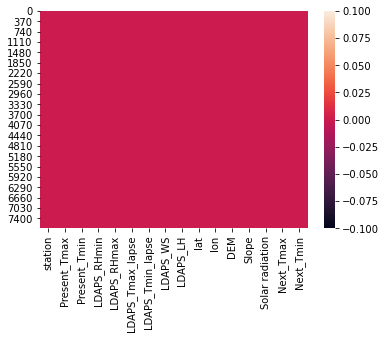

In [15]:
sns.heatmap(temp.isnull())

# Summary Statistics

In [16]:
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996904,29.782946,23.232056,56.401741,88.089988,29.497459,23.423193,7.057092,61.768678,37.544722,126.991397,61.867972,1.257048,5341.502803,30.271491,22.934198
std,7.213213,2.960585,2.404154,15.038788,7.715499,3.158976,2.503109,2.212072,34.383864,0.050352,0.079435,54.279780,1.370444,429.158867,3.123085,2.483502
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.735368,84.038809,27.601014,22.032374,5.647741,36.776474,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,30.000000,23.400000,54.828714,89.699505,29.662273,23.735942,6.531345,56.487289,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [17]:
temp.skew()

station             0.000100
Present_Tmax       -0.276483
Present_Tmin       -0.375457
LDAPS_RHmin         0.202176
LDAPS_RHmax        -1.109283
LDAPS_Tmax_lapse   -0.601161
LDAPS_Tmin_lapse   -0.851245
LDAPS_WS            1.485885
LDAPS_LH            0.586176
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.336871
Next_Tmin          -0.406685
dtype: float64

# EDA

<AxesSubplot:>

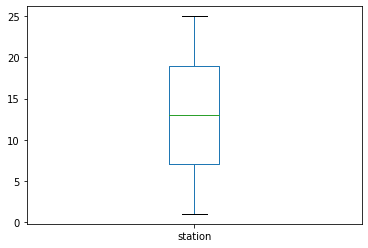

In [18]:
temp['station'].plot.box()

<AxesSubplot:>

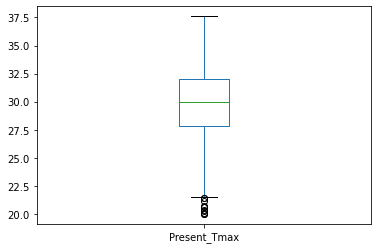

In [19]:
temp['Present_Tmax'].plot.box()

<AxesSubplot:>

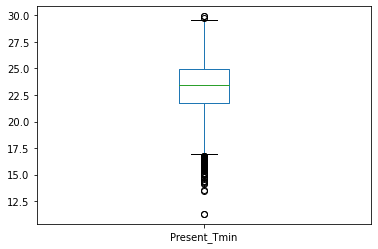

In [20]:
temp['Present_Tmin'].plot.box()

<AxesSubplot:>

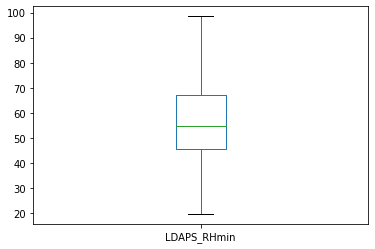

In [21]:
temp['LDAPS_RHmin'].plot.box()

<AxesSubplot:>

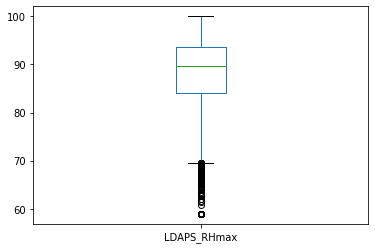

In [22]:
temp['LDAPS_RHmax'].plot.box()

<AxesSubplot:>

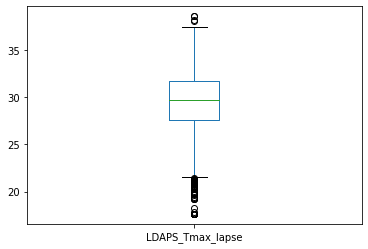

In [23]:
temp['LDAPS_Tmax_lapse'].plot.box()

<AxesSubplot:>

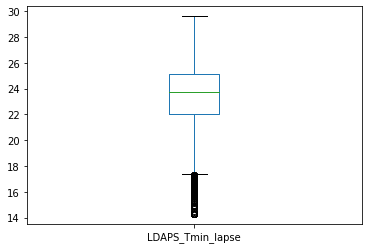

In [24]:
temp['LDAPS_Tmin_lapse'].plot.box()

<AxesSubplot:>

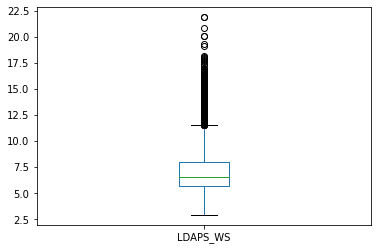

In [25]:
temp['LDAPS_WS'].plot.box()

<AxesSubplot:>

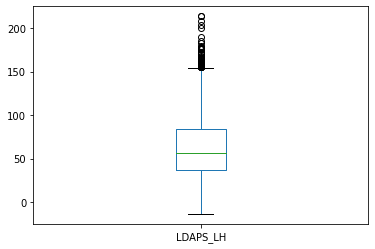

In [27]:
temp['LDAPS_LH'].plot.box()

<AxesSubplot:>

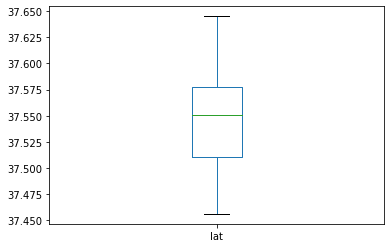

In [28]:
temp['lat'].plot.box()

<AxesSubplot:>

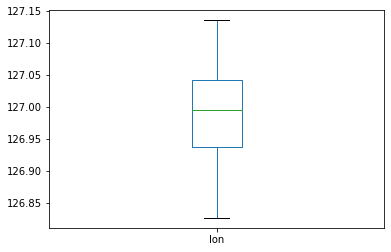

In [29]:
temp['lon'].plot.box()

<AxesSubplot:>

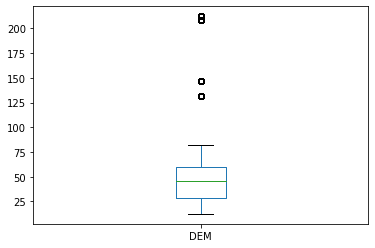

In [30]:
temp['DEM'].plot.box()

<AxesSubplot:>

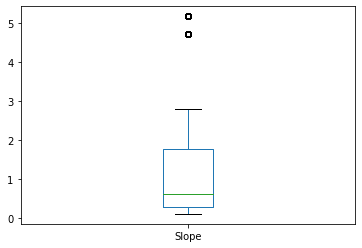

In [31]:
temp['Slope'].plot.box()

<AxesSubplot:>

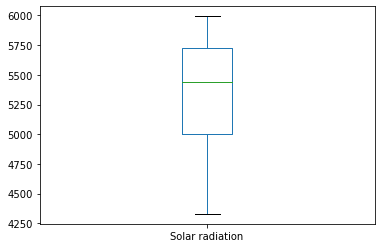

In [33]:
temp['Solar radiation'].plot.box()

<AxesSubplot:>

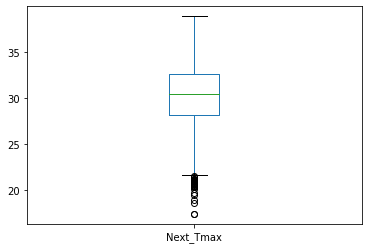

In [34]:
temp['Next_Tmax'].plot.box()

<AxesSubplot:>

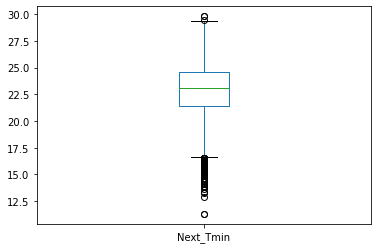

In [35]:
temp['Next_Tmin'].plot.box()

# Correlation

In [36]:
temp.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.111707,0.131483,-0.064828,-0.154365,0.064331,0.097898,0.004152,-0.130618,-0.237467,-0.118603,-0.256138,-0.090461,-0.018814,0.108569,0.128390
Present_Tmax,0.111707,1.000000,0.619221,-0.214998,-0.305792,0.501246,0.554768,-0.132777,0.116041,-0.053099,0.008635,-0.187098,-0.106605,-0.024943,0.608681,0.621846
Present_Tmin,0.131483,0.619221,1.000000,0.090367,-0.059385,0.384882,0.666980,-0.056793,-0.035814,-0.078764,-0.043659,-0.250294,-0.146821,0.053823,0.470941,0.796333
LDAPS_RHmin,-0.064828,-0.214998,0.090367,1.000000,0.611314,-0.419389,0.167924,0.325582,-0.015007,0.084541,-0.073998,0.099121,0.120115,0.248989,-0.454425,0.070956
LDAPS_RHmax,-0.154365,-0.305792,-0.059385,0.611314,1.000000,-0.182835,0.036238,0.193008,0.296986,0.181629,0.023808,0.164355,0.203716,0.157210,-0.308550,-0.100040
LDAPS_Tmax_lapse,0.064331,0.501246,0.384882,-0.419389,-0.182835,1.000000,0.700427,-0.215284,0.124012,-0.039079,0.084176,-0.166084,-0.150705,0.063188,0.723211,0.511372
LDAPS_Tmin_lapse,0.097898,0.554768,0.666980,0.167924,0.036238,0.700427,1.000000,-0.051714,-0.044372,-0.089752,-0.024898,-0.182240,-0.173282,0.167306,0.503437,0.788360
LDAPS_WS,0.004152,-0.132777,-0.056793,0.325582,0.193008,-0.215284,-0.051714,1.000000,0.046855,0.036014,-0.058423,0.187704,0.168621,0.128987,-0.359371,-0.111450
LDAPS_LH,-0.130618,0.116041,-0.035814,-0.015007,0.296986,0.124012,-0.044372,0.046855,1.000000,0.130056,0.025208,0.053829,0.084725,-0.035381,0.127318,-0.073270
lat,-0.237467,-0.053099,-0.078764,0.084541,0.181629,-0.039079,-0.089752,0.036014,0.130056,1.000000,0.289029,0.033165,0.074763,0.038513,-0.053295,-0.083677


<AxesSubplot:>

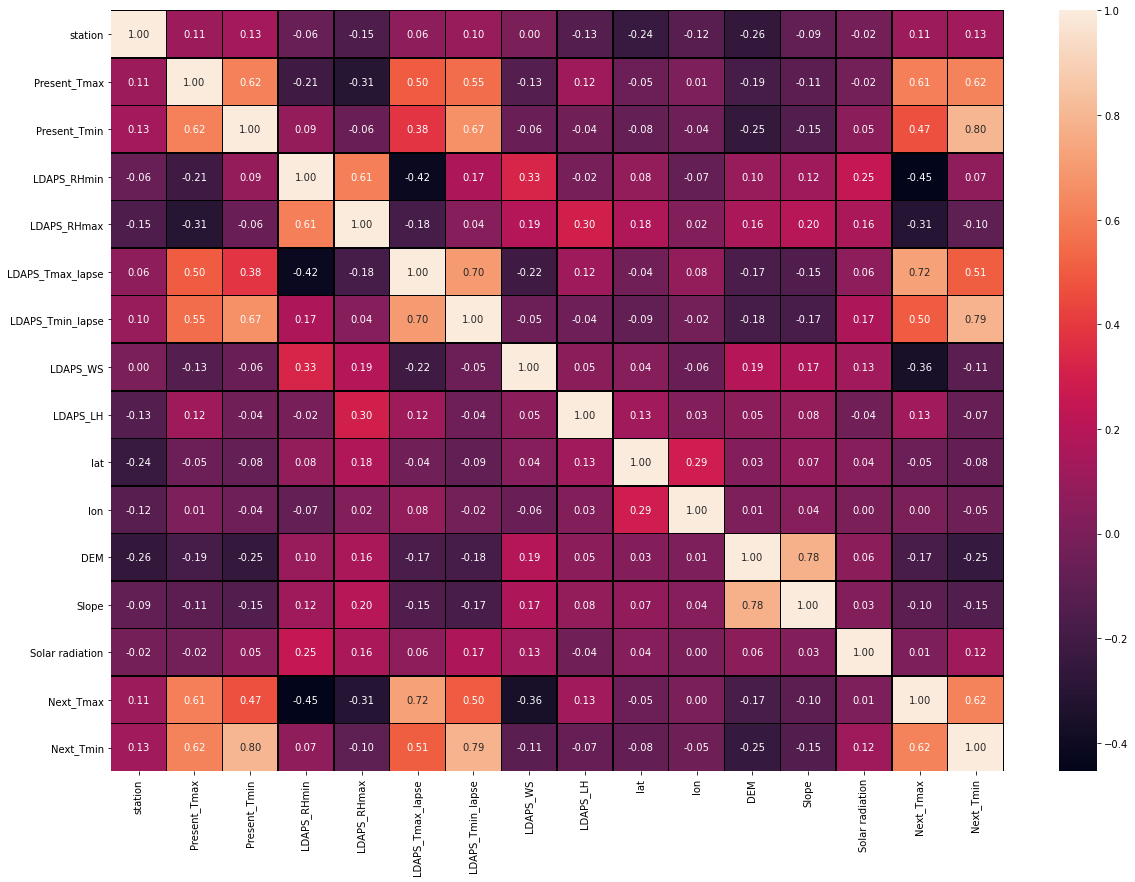

In [43]:
plt.figure(figsize = (20,14))
sns.heatmap(temp.corr(), annot = True, linewidth = .5, linecolor ='black', fmt = '.2f')

# Normal Distribution Curve

<AxesSubplot:xlabel='station', ylabel='Density'>

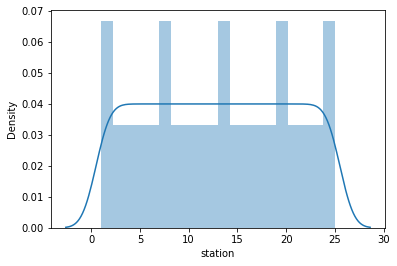

In [44]:
sns.distplot(temp['station'])

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

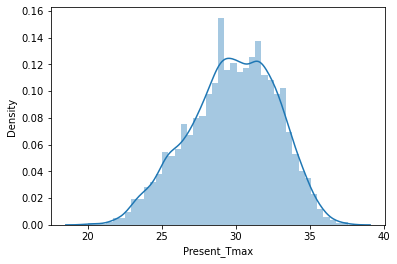

In [45]:
sns.distplot(temp['Present_Tmax'])

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

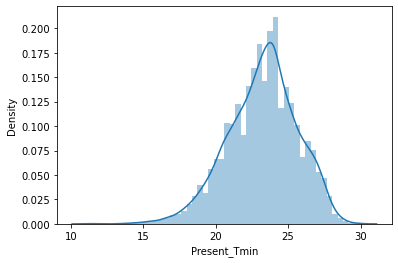

In [46]:
sns.distplot(temp['Present_Tmin'])

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

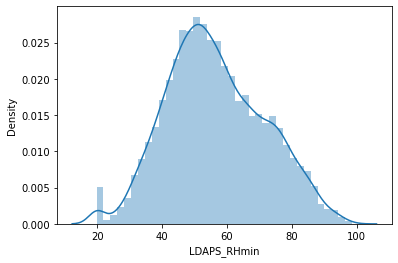

In [48]:
sns.distplot(temp['LDAPS_RHmin'])

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

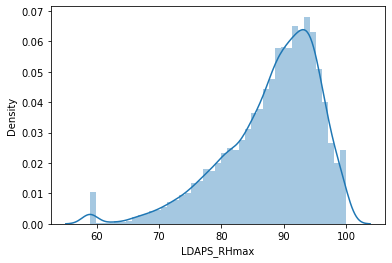

In [49]:
sns.distplot(temp['LDAPS_RHmax'])

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

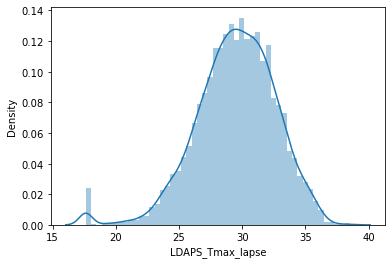

In [50]:
sns.distplot(temp['LDAPS_Tmax_lapse'])

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

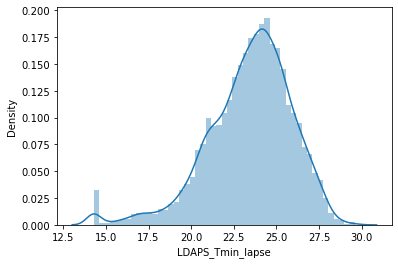

In [51]:
sns.distplot(temp['LDAPS_Tmin_lapse'])

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

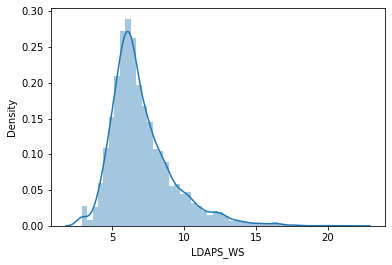

In [52]:
sns.distplot(temp['LDAPS_WS'])

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

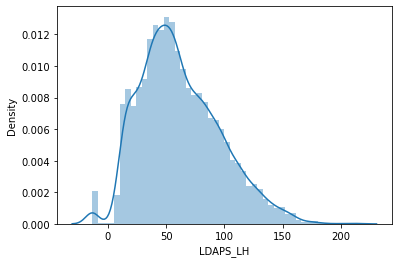

In [54]:
sns.distplot(temp['LDAPS_LH'])

<AxesSubplot:xlabel='lat', ylabel='Density'>

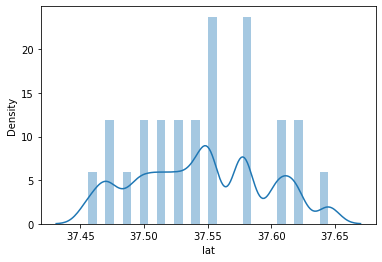

In [55]:
sns.distplot(temp['lat'])

<AxesSubplot:xlabel='lon', ylabel='Density'>

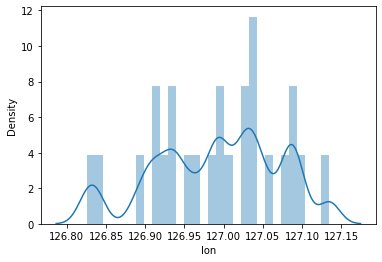

In [56]:
sns.distplot(temp['lon'])

<AxesSubplot:xlabel='DEM', ylabel='Density'>

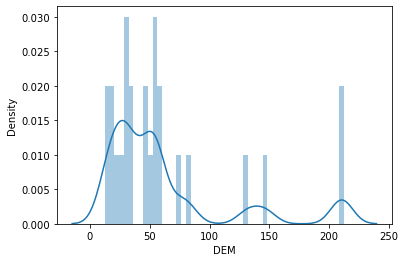

In [57]:
sns.distplot(temp['DEM'])

<AxesSubplot:xlabel='Slope', ylabel='Density'>

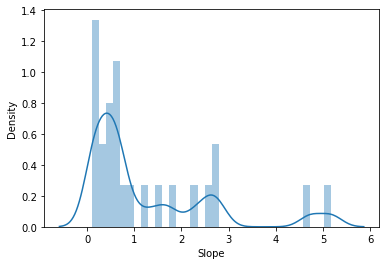

In [58]:
sns.distplot(temp['Slope'])

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

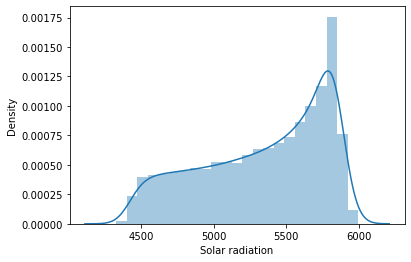

In [59]:
sns.distplot(temp['Solar radiation'])

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

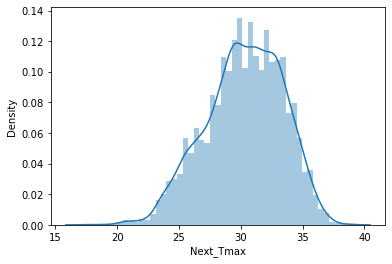

In [60]:
sns.distplot(temp['Next_Tmax'])

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

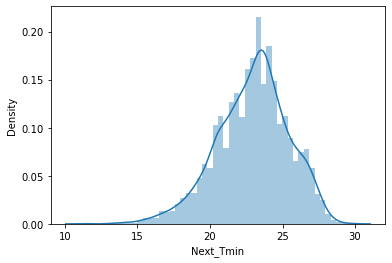

In [61]:
sns.distplot(temp['Next_Tmin'])

# Outliers

In [63]:
from scipy.stats import zscore
z = np.abs(zscore(temp))
z

array([[1.66329184, 0.36581161, 0.76208695, ..., 1.51793488, 0.3751312 ,
        0.69833234],
       [1.52464842, 0.71512575, 0.67889224, ..., 1.22994952, 0.07317235,
        0.17484411],
       [1.38600499, 0.61378787, 0.02826281, ..., 1.21653443, 0.26530245,
        0.38891244],
       ...,
       [1.66415031, 2.2236727 , 2.42598117, ..., 2.0743251 , 0.79141307,
        2.22852871],
       [1.66329184, 3.30461006, 4.96341987, ..., 2.35821196, 4.12166806,
        4.68489656],
       [1.66329184, 2.64054542, 2.77368828, ..., 1.51793488, 2.76299368,
        2.76474364]])

In [64]:
threshold = 3
print(np.where(z>3))

(array([  25,   33,   44,  175,  194,  269,  294,  344,  375,  394,  419,
        494,  519,  544,  569,  575,  584,  594,  969, 1025, 1025, 1025,
       1026, 1026, 1026, 1027, 1027, 1027, 1028, 1028, 1028, 1029, 1029,
       1029, 1030, 1030, 1030, 1031, 1031, 1031, 1032, 1032, 1032, 1033,
       1033, 1033, 1034, 1034, 1034, 1035, 1035, 1035, 1036, 1036, 1036,
       1037, 1037, 1037, 1038, 1038, 1038, 1039, 1039, 1039, 1040, 1040,
       1040, 1041, 1041, 1041, 1042, 1042, 1042, 1043, 1043, 1043, 1044,
       1044, 1044, 1045, 1045, 1045, 1046, 1046, 1046, 1047, 1047, 1047,
       1048, 1048, 1048, 1049, 1049, 1049, 1494, 1664, 1778, 1779, 1781,
       1791, 1794, 2175, 2176, 2177, 2178, 2179, 2179, 2180, 2181, 2181,
       2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192,
       2193, 2194, 2195, 2196, 2197, 2198, 2199, 2353, 2354, 2356, 2369,
       2375, 2378, 2394, 2441, 2528, 2544, 2569, 2675, 2750, 2775, 3104,
       3116, 3166, 3184, 3190, 3191, 3191, 3202, 3

In [66]:
temp_new =temp[(z<3).all(axis=1)]
print(temp.shape)
print(temp_new.shape)

(7752, 16)
(7445, 16)


# Divide Data in Feature & Vector

In [67]:
x = temp_new.drop(['Next_Tmin'], axis=1)
y= temp_new['Next_Tmin']

# Remove Skewness

In [69]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
x = power_transform(x, method= 'yeo-johnson')
print(x)

sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-1.74504367 -0.43552013 -0.84260933 ...  1.2848064   2.03003512
  -0.47268435]
 [-1.56825724  0.7012875  -0.76081686 ... -0.29249867  1.48053442
  -0.01316842]
 [-1.4045997   0.58879735 -0.03949542 ... -0.94869679  1.45642727
   0.19228359]
 ...
 [ 1.37207757 -2.06025618 -2.44923714 ... -1.36097301 -1.66872151
  -0.72350617]
 [ 1.50805715 -2.06025618 -2.24239792 ... -1.10062194 -1.67369241
  -0.63041487]
 [ 1.64378251 -2.08715252 -2.34652078 ... -0.93153392 -1.66059088
  -0.87612761]]
[[-1.74504367 -0.43552013 -0.84260933 ...  1.2848064   2.03003512
  -0.47268435]
 [-1.56825724  0.7012875  -0.76081686 ... -0.29249867  1.48053442
  -0.01316842]
 [-1.4045997   0.58879735 -0.03949542 ... -0.94869679  1.45642727
   0.19228359]
 ...
 [ 1.37207757 -2.06025618 -2.44923714 ... -1.36097301 -1.66872151
  -0.72350617]
 [ 1.50805715 -2.06025618 -2.24239792 ... -1.10062194 -1.67369241
  -0.63041487]
 [ 1.64378251 -2.08715252 -2.34652078 ... -0.93153392 -1.66059088
  -0.87612761]]


# Model

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [71]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 172  The model performs very well
At random_state:- 172
Training r2_score is:- 82.89724763026518
Testing r2_score is:- 82.90075351645135
At random state 248  The model performs very well
At random_state:- 248
Training r2_score is:- 82.8992493310028
Testing r2_score is:- 82.89736086972864
At random state 870  The model performs very well
At random_state:- 870
Training r2_score is:- 82.9014749422587
Testing r2_score is:- 82.89785118053302


In [72]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x,y,random_state=248,test_size=0.20)

In [73]:
lr.fit(x_train, y_train)

LinearRegression()

In [74]:
lr.score(x_train, y_train)

0.8307436987817084

In [75]:
# predict the value

pred = lr.predict(x_test)
print("Predicted result price: ", pred)
print("actual price ", y_test)

Predicted result price:  [19.66894216 19.90860965 23.34572415 ... 22.88953385 24.0966816
 21.01073632]
actual price  3540    21.2
3514    18.5
4362    24.0
2982    21.7
1455    22.9
        ... 
464     23.4
188     22.3
7285    23.8
4256    21.4
3285    20.6
Name: Next_Tmin, Length: 1489, dtype: float64


In [76]:
print('error:')

print('Mean absolute error: ', mean_absolute_error(y_test, pred))
print('Mean squared error: ', mean_squared_error(y_test, pred))

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))

print(r2_score(y_test, pred))

error:
Mean absolute error:  0.7709394638754123
Mean squared error:  0.9703733732369964
Root Mean Squared Error:  0.9850753134847083
0.8220925226861788


# Regularization

# Lasso

In [77]:
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.14249974311521
R2_score is :- 81.55101865205427


At cv:- 3
Cross validation score is:- 77.09542924126914
R2_score is :- 81.55101865205427


At cv:- 4
Cross validation score is:- 78.70142052484186
R2_score is :- 81.55101865205427


At cv:- 5
Cross validation score is:- 77.51842923432902
R2_score is :- 81.55101865205427


At cv:- 6
Cross validation score is:- 75.6921197975723
R2_score is :- 81.55101865205427


At cv:- 7
Cross validation score is:- 76.53124758543119
R2_score is :- 81.55101865205427


At cv:- 8
Cross validation score is:- 76.60950432337815
R2_score is :- 81.55101865205427


At cv:- 9
Cross validation score is:- 69.77445726212177
R2_score is :- 81.55101865205427




In [78]:
print("At cv:-",2)
print("Cross validation score is:-", 80.14249974311521 )
print("R2_score is :-", 81.55101865205427)

At cv:- 2
Cross validation score is:- 80.14249974311521
R2_score is :- 81.55101865205427


In [79]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 0.786303703682147
Mean Squared Error: 0.9993412202787402
Root Mean Square Error: 0.9996705558726535


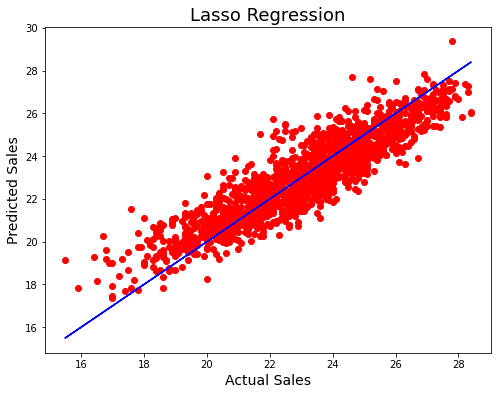

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# Model Saving

In [81]:
import pickle
filename = 'Temperature.pkl'
pickle.dump(ls, open(filename, 'wb'))

# Conclusion

In [82]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
temperature = pd.DataFrame({"original": a, "predicted": predicted}, index = range(len(a)))
temperature

,original,predicted
0,21.2,19.668942
1,18.5,19.908610
2,24.0,23.345724
3,21.7,20.932188
4,22.9,23.231864
...,...,...
1484,23.4,24.544708
1485,22.3,23.328249
1486,23.8,22.889534
1487,21.4,24.096682
